<a href="https://colab.research.google.com/github/jcval94/Out-of-the-box/blob/master/Distribuciones_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import seaborn as sns
from tensorflow.keras.layers import Input, Concatenate
from tensorflow import keras
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow.keras.layers import LSTM 
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
plt.style.use('ggplot')

## Creacion de las normales

In [ ]:
COLS = list(range(0,500))+['mu','sigma']
df = pd.DataFrame(columns=COLS)

for i in range(250):
  mu, sigma = np.random.uniform(low=0, high=100, size=2)
  s = np.random.normal(mu, sigma, 500)
  df_length = len(df)
  df.loc[df_length] = list(sorted(np.random.normal(mu, sigma, 500)))+[mu, sigma]

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,mu,sigma
0,-53.261197,-52.436642,-49.657046,-45.821354,-38.859805,-38.102756,-37.224944,-36.853551,-35.752429,-34.892319,-33.332571,-32.523481,-32.371410,-32.344313,-31.868957,-31.175624,-28.423245,-27.477182,-27.419918,-26.564546,-25.735689,-25.108360,-23.322271,-23.290260,-23.286082,-22.242638,-21.974116,-21.728708,-21.127510,-21.047661,-21.035966,-20.851163,-20.010936,-19.918000,-19.731229,-19.454958,-19.415524,-19.183888,-19.118785,-19.056176,...,55.811426,56.730155,57.100680,57.176468,57.205738,57.471937,58.358763,58.665835,58.782022,58.974836,59.435173,59.629743,59.633821,59.916090,60.225265,60.456481,61.239729,61.822961,63.488417,64.487125,66.113310,66.176353,66.498515,67.123600,67.180393,67.269515,69.425291,70.660535,71.049488,71.118621,72.916776,74.049504,76.903554,77.681663,81.619190,81.972352,84.448254,89.737957,18.617354,25.761274
1,-246.249180,-208.505087,-170.205307,-166.622355,-166.016269,-165.120955,-164.761766,-162.265284,-160.415825,-143.584961,-142.888816,-142.831444,-141.461153,-140.136600,-138.913974,-136.134021,-135.107449,-134.522939,-131.593535,-129.742692,-129.538608,-126.511980,-125.135151,-124.289488,-124.024339,-123.908750,-119.448191,-112.391204,-108.987211,-102.550430,-102.426376,-101.640578,-100.304751,-97.682160,-94.844792,-93.926600,-92.797030,-92.145813,-92.101975,-91.759571,...,178.382504,179.421089,182.414486,183.475862,184.381811,185.473573,187.066441,187.645481,188.510384,189.389865,190.607827,191.535759,193.299665,197.027214,198.092839,204.469733,204.724239,210.378050,211.046775,213.079922,213.687029,216.390914,217.771823,220.439401,223.650024,224.139931,224.769496,230.138802,232.099684,238.292387,240.506325,245.139857,248.605345,269.794008,279.437120,293.165786,302.361061,404.301301,43.875710,95.721118
2,-214.529472,-201.660929,-176.464664,-173.575989,-162.767885,-152.295582,-151.523891,-147.486827,-143.988558,-138.445473,-137.549625,-136.647709,-136.627680,-136.598218,-134.756158,-129.261733,-123.078383,-122.769046,-121.431371,-117.340355,-112.729272,-110.658777,-110.071178,-106.364135,-106.305571,-104.035938,-103.255837,-102.044225,-101.548722,-99.081994,-98.514660,-98.031843,-94.956201,-93.708567,-92.928556,-91.847989,-90.804654,-90.463480,-88.825632,-88.801172,...,144.468260,146.707031,146.983397,147.344891,148.029455,148.492093,149.553218,149.988333,152.327690,154.201123,156.490742,157.663761,158.865659,160.289513,161.565743,162.243145,163.266279,164.404110,167.102280,170.321733,173.743818,176.024068,176.583458,177.965476,179.108726,179.800538,185.531890,186.900503,192.950609,196.085495,201.612639,202.529471,204.525510,204.965094,211.597087,235.280489,236.975917,238.707493,23.565797,76.718720
3,-291.220154,-242.315812,-241.529243,-233.385432,-225.216603,-218.992301,-218.720023,-213.672005,-208.319570,-199.610467,-198.475121,-197.758529,-194.690878,-192.855764,-188.775856,-185.760830,-185.131056,-184.457940,-182.693035,-182.379851,-181.539777,-174.915215,-166.834127,-166.364564,-162.269436,-161.870322,-153.263023,-152.450763,-151.628079,-151.022590,-144.208441,-142.776310,-142.711028,-141.425108,-141.270529,-137.967369,-135.761525,-135.309875,-134.752954,-134.574916,...,147.355263,149.187404,149.247296,150.477155,150.610384,152.076156,156.379873,159.594973,160.643039,161.194909,161.219755,161.750727,163.385356,163.502980,164.466584,165.528860,166.082037,166.511040,167.640939,169.949210,173.213136,176.813038,180.069765,196.145942,196.989088,197.808582,201.223841,203.450846,206.501627,209.165947,209.235760,209.940222,211.078513,226.576719,244.971328,246.567043,248.011400,251.337953,5.094230,96.818013
4,-97.488186,-51.408538,-50.330406,-49.277410,-47.599787,-36.031509,-35.732454,-30.907245,-27.786798,-27.078861,-26.857265,-2

In [ ]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:499]
y = df.iloc[:,501]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 499)               249500    
_________________________________________________________________
dense_20 (Dense)             (None, 50)                25000     
_________________________________________________________________
dense_21 (Dense)             (None, 5)                 255       
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 6         
Total params: 274,761
Trainable params: 274,761
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(X_train, y_train, epochs=25, verbose=1, validation_split=0.2)
predictions = model.predict(X_test)

Epoch 1/25
5/5 [==============================] - 1s 77ms/step - loss: 7902.9572 - mse: 7902.9572 - mae: 62.7063 - val_loss: 2389.8730 - val_mse: 2389.8730 - val_mae: 40.8068
Epoch 2/25
5/5 [==============================] - 0s 12ms/step - loss: 997.2871 - mse: 997.2871 - mae: 25.7668 - val_loss: 564.6411 - val_mse: 564.6411 - val_mae: 18.8505
Epoch 3/25
5/5 [==============================] - 0s 12ms/step - loss: 736.3344 - mse: 736.3344 - mae: 21.9823 - val_loss: 545.2746 - val_mse: 545.2746 - val_mae: 21.1791
Epoch 4/25
5/5 [==============================] - 0s 13ms/step - loss: 263.6153 - mse: 263.6153 - mae: 13.6588 - val_loss: 496.6542 - val_mse: 496.6542 - val_mae: 19.8605
Epoch 5/25
5/5 [==============================] - 0s 13ms/step - loss: 221.4394 - mse: 221.4394 - mae: 11.5343 - val_loss: 329.9279 - val_mse: 329.9279 - val_mae: 15.6407
Epoch 6/25
5/5 [==============================] - 0s 14ms/step - loss: 147.0811 - mse: 147.0811 - mae: 10.1671 - val_loss: 87.9902 - val_mse:

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


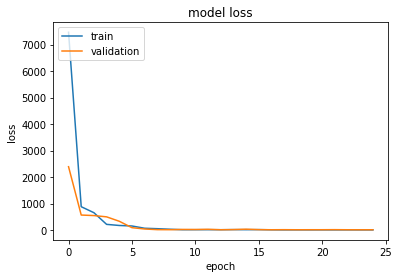

In [ ]:
import matplotlib.pyplot as plt

print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print(mean_absolute_error(y_test, predictions))
print(mean_squared_error(y_test, predictions))

1.2074146826842784
3.2280692612372146


In [ ]:
resul = pd.DataFrame(columns=['y_test','pred'])
resul['y_test'] = y_test
resul['pred'] = predictions
resul

,y_test,pred
142,11.749781,12.234631
6,3.034525,3.550919
97,16.705008,16.074200
60,39.379640,42.008999
112,65.606123,68.294640
...,...,...
79,53.927495,58.269737
86,18.110482,18.766750
5,65.007505,64.065269
56,77.731294,78.188873


# Modelo bimodal

In [602]:
import numpy as np
import pandas as pd
COLS = list(range(0,500*2-1))+['mu_1','sigma_1','mu_2','sigma_2']
df = pd.DataFrame(columns=COLS)

for i in range(1000):
  mu1, sigma1 = np.random.uniform(low=0, high=100, size=2)
  mu2, sigma2 = np.random.uniform(low=0, high=100, size=2)
  s1 = np.random.normal(mu1, sigma1, 250).tolist()
  s2 = np.random.normal(mu2, sigma2, 250).tolist()
  df_length = len(df)
  df.loc[df_length] = list(sorted(s1+s2)+list(np.diff(sorted(s1+s2))))+[mu1, sigma1, mu2, sigma2]

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,mu_1,sigma_1,mu_2,sigma_2
0,-22.735859,11.397592,12.350924,16.155165,16.259040,18.020668,19.557266,20.888555,20.947452,22.039248,24.702741,25.855809,25.964645,26.237562,29.895957,34.387783,37.427841,38.942129,38.946160,40.591305,44.491010,44.810332,45.618026,45.803588,46.322712,47.622025,47.696769,47.898318,47.903831,48.020484,48.347023,48.572053,48.644204,48.649572,48.655386,48.876151,49.040421,49.110544,49.381933,49.531480,...,0.184602,0.184773,1.133221,0.254495,0.726476,0.090662,0.322435,0.648640,0.766042,0.450390,0.209151,1.031524,1.038650,2.377848,0.082253,2.303877,0.878945,0.103061,0.233700,0.250763,0.055563,0.187427,0.681600,1.144153,0.826184,2.561144,2.243213,0.270127,0.632301,2.573498,1.314213,1.496681,1.516079,3.371312,10.706808,1.591555,64.179201,8.891701,81.161388,27.668873
1,-6.878397,-3.262231,-2.786758,-1.545881,-1.544247,-1.420854,0.246469,0.269424,0.840951,1.713147,2.057069,2.897386,3.036204,3.227296,3.571172,3.973370,3.983241,4.911710,5.859215,6.677450,6.763508,6.952067,7.421114,7.459989,7.554897,7.575779,8.367280,9.297073,9.401686,10.030325,10.381520,10.454882,10.542278,10.699159,11.032101,11.046262,11.087335,11.310111,11.473444,11.648231,...,0.060656,0.027986,0.690244,0.094858,0.032702,0.307292,0.043420,0.118732,0.038583,0.159453,0.003283,0.308073,0.063225,0.072003,0.087595,0.839430,0.230614,0.397257,0.100373,0.166842,0.249968,0.352361,0.050737,0.345778,0.695903,0.117693,1.165725,0.510893,0.165141,0.496192,0.157952,1.828847,1.985468,0.648111,2.525872,10.854246,25.423867,14.381383,54.711054,10.569200
2,-177.790894,-175.527491,-168.134687,-151.831040,-151.646509,-146.570974,-144.915956,-139.437382,-132.994829,-125.415243,-121.742038,-117.336503,-116.313380,-115.698344,-115.019738,-114.314551,-111.823715,-111.303014,-111.016055,-105.902826,-105.016435,-103.248080,-100.104835,-99.038158,-98.156461,-97.950743,-96.671427,-94.140685,-92.553661,-91.697648,-91.204306,-90.384561,-89.964185,-86.825862,-86.375417,-85.881845,-85.327153,-84.969294,-80.916645,-80.526513,...,0.386867,0.484482,0.399311,0.487408,0.959146,1.294975,4.440581,4.196401,1.574591,0.654116,0.635238,0.409925,3.747151,1.259410,1.677228,0.162174,0.632145,0.800984,0.797302,2.496858,3.116375,1.182506,1.178725,1.093019,0.942618,0.107430,1.227588,3.641055,3.956285,1.287442,6.217843,3.498491,2.288860,1.607037,2.349800,3.853873,59.718502,52.557130,8.934948,83.171784
3,-90.342460,-89.386809,-85.002788,-68.877428,-51.778164,-46.770704,-44.266146,-43.104515,-36.023633,-33.038927,-27.697773,-26.603388,-21.854023,-21.041413,-20.110819,-18.396684,-18.245219,-15.210971,-14.490047,-9.880887,-9.688566,-7.193837,-6.552373,-1.576478,-0.852058,0.105149,1.133206,5.272503,6.446571,6.875256,8.530614,9.547276,11.574830,12.638369,18.010408,19.110781,21.347202,23.326345,23.467162,25.429516,...,3.526966,0.410145,2.504603,0.727182,1.092051,1.786902,0.505239,2.032456,4.035845,2.526155,0.038087,2.294950,2.836609,2.079627,3.490858,1.004241,0.477261,1.090525,0.362495,0.045766,0.176953,1.927816,5.500590,1.405430,3.838654,2.936695,0.512809,2.665344,0.504248,1.708824,2.799800,4.781251,12.555794,0.422690,6.832720,24.447824,91.660777,72.334307,76.586154,0.848319
4,-62.574612,-49.971462,-44.484458,-44.431226,-43.106113,-41.716000,-38.245841,-36.726502,-33.872459,-33.177352,-31.424708,-30.955187,-29.207986,-28.508022,-28.232646,-25.500481,-23.416168,-21.156604,-20.823154,-19.862300,-19.724018,-18.811838,-16.761663,-16.580159,-15.654778,-14.838067,-14.337830,-11.547758,-10.475842,-9.552873,-9.517784,-9.311497,-9.019885,-8.094426,-7.856709,-7.462529,-5.479595,-3.666670,-3.299616,-2.829476,...,0.102865,0.228956,0.014437,0.172120,0.044053,0.002886,0.192742,0.090164,0.032245,0.323386,0.186048,0.540386,0.369049,1.240022,0.939148,0.353555,0.

In [603]:
X = df.iloc[:,:(len(df.columns)-4)]
y = df.iloc[:,(len(df.columns)-4):]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# GAUSSIAN (GRUPO DE CONTROL)

In [604]:
from random import seed
seed(111)

In [ ]:
from sklearn import mixture
def resul(x1, x2):
  pval_ad = stats.anderson_ksamp([x1,x2]).significance_level
  pval_ks = stats.ks_2samp(x1, x2).pvalue
  return (pval_ad, pval_ks)

pvals1 = []
pvals2 = []
for i in range(len(y_test)):
  muestra = X_test.iloc[i,:500]
  # X = np.array([[0, a] for a in muestra])
  gmm = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(np.asarray(muestra).reshape(-1,1))
  # gmm.means_ gmm.covariances_
  dpgmm = mixture.BayesianGaussianMixture(n_components=2,
                                          covariance_type='full').fit(np.asarray(muestra).reshape(-1,1))

  parms = y_test.iloc[i,:]
  m1, s1, m2, s2 = (parms[0], parms[1], parms[2],parms[3])
  x1 = np.random.normal(m1, s1,size=1000).tolist() + np.random.normal(m2, s2,size=1000).tolist()
  
  m1, m2 = gmm.means_
  s1, s2 = gmm.covariances_
  x2 = np.random.normal(m1[0], np.sqrt(s1[0]),size=1000).tolist() + np.random.normal(m2[0], np.sqrt(s2[0]),size=1000).tolist()
  pvals1.append(resul(x1, x2))
  pvals2.append(resul(x1, x2))

In [608]:
#GRupo de control
pd.DataFrame({'AD': [x[0] for x in pvals1], 'KS': [x[1] for x in pvals1]}).describe()

,AD,KS
count,330.000000,3.300000e+02
mean,0.049059,9.400091e-02
std,0.086841,1.942607e-01
min,0.001000,2.977083e-217
25%,0.001000,1.404082e-21
50%,0.001000,2.195342e-04
75%,0.045031,6.255257e-02
max,0.250000,9.699601e-01


In [609]:
pd.DataFrame({'AD': [x[0] for x in pvals2], 'KS': [x[1] for x in pvals2]}).describe()

,AD,KS
count,330.000000,3.300000e+02
mean,0.049059,9.400091e-02
std,0.086841,1.942607e-01
min,0.001000,2.977083e-217
25%,0.001000,1.404082e-21
50%,0.001000,2.195342e-04
75%,0.045031,6.255257e-02
max,0.250000,9.699601e-01


## idea percentiles

In [ ]:
import numpy as np
import pandas as pd
COLS = list(range(0,500*2-1))+['mu_1','sigma_1','mu_2','sigma_2']
df = pd.DataFrame(columns=COLS)

for i in range(2500):
  mu1, sigma1 = np.random.uniform(low=0, high=100, size=2)
  mu2, sigma2 = np.random.uniform(low=0, high=100, size=2)
  s1 = np.random.normal(mu1, sigma1, 250).tolist()
  s2 = np.random.normal(mu2, sigma2, 250).tolist()
  df_length = len(df)
  df.loc[df_length] = list(sorted(s1+s2)+list(np.diff(sorted(s1+s2))))+[mu1, sigma1, mu2, sigma2]

df.head()

In [51]:
from tensorflow.keras.layers import Conv2D,Conv1D

In [67]:
model = Sequential()
model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

# model.add(LSTM(128, input_shape=(X_train.shape[1],1), return_sequences=True))
# model.add(Dropout(0.2))

# model.add(LSTM(64, return_sequences=True))
# model.add(Dropout(0.1))
# model.add(BatchNormalization())
# model.add(Conv1D(filters=64, kernel_size=1,  activation='relu',input_shape=(X_train.shape[1],1)))

model.add(Dense(250, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(100, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='elu'))
model.add(Dense(10, activation='elu'))
model.add(Dense(4, activation='linear'))
# model.add(Dense(1, activation='softmax')) # mse: 3278.2609 - mae: 49.5778

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 999)               999000    
_________________________________________________________________
dense_22 (Dense)             (None, 250)               250000    
_________________________________________________________________
dense_23 (Dense)             (None, 100)               25100     
_________________________________________________________________
dense_24 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_25 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_26 (Dense)             (None, 10)                260       
_________________________________________________________________
dense_27 (Dense)             (None, 4)                

In [68]:
from tensorflow.keras.callbacks import TensorBoard
import datetime
logdir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = TensorBoard(log_dir= logdir)

model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit((X_train), y_train, #np.expand_dims
                  epochs=30, verbose=1,
                  validation_split=0.2,
                  callbacks=[tensorboard])
predictions = model.predict((X_test))

Epoch 1/30
42/42 [==============================] - 1s 11ms/step - loss: 1972.1358 - mse: 1972.1358 - mae: 34.7123 - val_loss: 603.1470 - val_mse: 603.1470 - val_mae: 20.0795
Epoch 2/30
42/42 [==============================] - 0s 4ms/step - loss: 531.6338 - mse: 531.6338 - mae: 18.6438 - val_loss: 439.6738 - val_mse: 439.6738 - val_mae: 17.2577
Epoch 3/30
42/42 [==============================] - 0s 4ms/step - loss: 476.8316 - mse: 476.8316 - mae: 17.7766 - val_loss: 478.4744 - val_mse: 478.4744 - val_mae: 17.9154
Epoch 4/30
42/42 [==============================] - 0s 4ms/step - loss: 451.8553 - mse: 451.8553 - mae: 17.4142 - val_loss: 486.3299 - val_mse: 486.3299 - val_mae: 18.1391
Epoch 5/30
42/42 [==============================] - 0s 4ms/step - loss: 483.6832 - mse: 483.6832 - mae: 17.9832 - val_loss: 433.6422 - val_mse: 433.6422 - val_mae: 17.0922
Epoch 6/30
42/42 [==============================] - 0s 5ms/step - loss: 459.2229 - mse: 459.2229 - mae: 17.6691 - val_loss: 432.0845 - va

In [ ]:
%load_ext tensorboard

In [ ]:
# !kill 1009
%tensorboard --logdir logs/fit

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


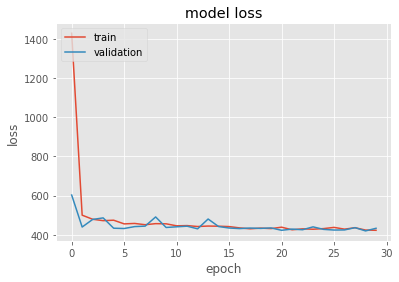

In [69]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [137]:
pvals = []  
  
for i in range(len(y_test)):
  parms = y_test.iloc[i,:]
  predictions[i]
  m1, s1, m2, s2 = (parms[0], parms[1], parms[2],parms[3])
  x1 = np.random.normal(m1, s1,size=1000).tolist() + np.random.normal(m2, s2,size=1000).tolist()
  m1, s1, m2, s2 = (predictions[i][0],predictions[i][1],predictions[i][2],predictions[i][3])
  x2 = np.random.normal(m1, s1,size=1000).tolist() + np.random.normal(m2, s2,size=1000).tolist()
  pvals.append(resul(x1, x2))


pd.DataFrame({'AD': [x[0] for x in pvals], 'KS': [x[1] for x in pvals]}).describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: p-value floored: true value smaller than 0.001
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: p-value capped: true value larger than 0.25
  


,AD,KS
count,825.000000,8.250000e+02
mean,0.005930,1.788679e-02
std,0.025262,6.791817e-02
min,0.001000,5.340475e-230
25%,0.001000,2.549041e-24
50%,0.001000,1.810074e-07
75%,0.001000,1.489409e-03
max,0.250000,8.187536e-01


In [ ]:
print(mean_absolute_error(y_test, [ln[0] for ln in predictions[0].tolist()]))
print(mean_squared_error(y_test, [ln[0] for ln in predictions[0].tolist()]))

In [ ]:
resul = pd.DataFrame(columns=['y_test','pred'])
resul['y_test'] = y_test
resul['pred'] = predictions
resul

# Idea por distribución

In [551]:
resultados = []
seed(111)
muestras = []
for i in range(2000):
  mu1, sigma1 = np.random.uniform(low=0, high=100, size=2)
  mu2, sigma2 = np.random.uniform(low=0, high=100, size=2)

  if mu1>mu2:
    mu1_ = copy.deepcopy(mu1)
    mu1 = copy.deepcopy(mu2)
    mu2 = copy.deepcopy(mu1_)
    sigma1_ = copy.deepcopy(sigma1)
    sigma1 = copy.deepcopy(sigma2)
    sigma2 = copy.deepcopy(sigma1_)

  s1 = np.random.normal(mu1, sigma1, 250).tolist()
  s2 = np.random.normal(mu2, sigma2, 250).tolist()
  valor = sorted(s1+s2)
  muestras.append(valor)
  resultados.append([mu1, sigma1, mu2, sigma2, abs(mu1-mu2)])

In [570]:
COLS = list(range(0,500*2-1))+['mu_1','sigma_1','mu_2','sigma_2']
df = pd.DataFrame(columns=COLS)

evidencia = []
for valor in muestras:
  dplot = sns.distplot(valor, kde=True, bins = 45)#, kde_kws={'bw':0.1}
  coords = dplot.get_lines()[0].get_data()
  
  smooth_d1 = np.gradient(coords[1])#gaussian_filter1d
  smooth_d2 = np.gradient(smooth_d1)
  maxis = sorted([(coords[1][i],coords[0][i]) for i in np.where(np.diff(np.sign(smooth_d1)))[0]], reverse=True)
  infls = sorted([(coords[1][i],coords[0][i]) for i in np.where(np.diff(np.sign(smooth_d2)))[0]], reverse=True)
  percentiles = np.percentile(valor,range(0,101))
  # gmm = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(np.asarray(valor).reshape(-1,1))
  # gmm.means_ gmm.covariances_

  plt.close()

  evidencia.append([valor,
                    coords[0],
                    coords[1],
                    np.asarray([item for item in maxis[:1][0]+infls[0]+infls[1]]+
                    [np.mean(valor), np.std(valor), stats.kurtosis(valor), len(maxis), len(infls)]),
                    percentiles
                    ])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

In [582]:
resultados_ = [[m1, s1, m2, s2] for m1, s1, m2, s2, difer in resultados]

X = evidencia.copy()
y = resultados_.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [584]:
import copy
input0 = Input(shape=(len(valor),))
input1 = Input(shape=(len(coords[1]),))
input2 = Input(shape=(len(coords[1]),))
input3 = Input(shape=(11,))
input4 = Input(shape=(101,))
inputs_ = [input0, input1, input2, input3, input4]
merged = Concatenate(axis=1)(inputs_)

dense1 = Dense(328, input_dim=4, kernel_initializer='normal', activation='relu')(merged)#, activation='sigmoid', use_bias=True
dense2 = Dense(128, activation='relu')(dense1)
dense21 = Dense(64, activation='relu')(dense1)
dense3 = Dense(32, activation='relu')(dense21)
dense4 = Dense(8, activation='relu')(dense3)
output = Dense(4, activation='linear')(dense4)
model_m1 = keras.models.Model(inputs=inputs_, outputs=output)
# model_m2 = copy.deepcopy(model_m1)
model_m1.summary()

Model: "model_28"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_129 (InputLayer)          [(None, 500)]        0                                            
__________________________________________________________________________________________________
input_130 (InputLayer)          [(None, 200)]        0                                            
__________________________________________________________________________________________________
input_131 (InputLayer)          [(None, 200)]        0                                            
__________________________________________________________________________________________________
input_132 (InputLayer)          [(None, 11)]         0                                            
___________________________________________________________________________________________

In [585]:
inp0=[]
inp1=[]
inp3=[]
inp2=[]
inp4=[]

inp0_=[]
inp1_=[]
inp3_=[]
inp2_=[]
inp4_=[]

for a in X_train:
  inp0.append(a[0])#[float(item) for sublist in a[0] for item in sublist]
  inp1.append(a[1].tolist())
  inp2.append(a[2].tolist())
  inp3.append(a[3].tolist())
  inp4.append(a[4].tolist())

for a in X_test:
  inp0_.append(a[0])#[float(item) for sublist in a[0] for item in sublist])
  inp1_.append(a[1].tolist())
  inp2_.append(a[2].tolist())
  inp3_.append(a[3].tolist())
  inp4_.append(a[4].tolist())

inp0 = np.array(inp0)
inp1 = np.array(inp1)
inp2 = np.array(inp2)
inp3 = np.array(inp3)
inp4 = np.array(inp4)

inp0_ = np.array(inp0_)
inp1_ = np.array(inp1_)
inp2_ = np.array(inp2_)
inp3_ = np.array(inp3_)
inp4_ = np.array(inp4_)

outp1 = np.asarray(y_train)
outp1_ = np.asarray(y_test)
# print(len(inp1))
# print(len(inp2))
# print(len(inp3))
# print(len(outp1))

In [588]:
from tensorflow.keras.callbacks import TensorBoard
import datetime
logdir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = TensorBoard(log_dir= logdir)

model_m1.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

history=model_m1.fit([inp0, inp1, inp2, inp3, inp4], outp1, 
                  epochs=50, 
                  verbose=1,
                  validation_split=0.2,
                  callbacks=[tensorboard])

predictions = model_m1.predict([inp0_, inp1_, inp2_, inp3_, inp4_])

Epoch 1/50
34/34 [==============================] - 1s 11ms/step - loss: 423.8220 - mse: 423.8220 - mae: 14.7775 - val_loss: 190.3875 - val_mse: 190.3875 - val_mae: 10.5625
Epoch 2/50
34/34 [==============================] - 0s 5ms/step - loss: 159.1207 - mse: 159.1207 - mae: 9.7139 - val_loss: 160.2045 - val_mse: 160.2045 - val_mae: 9.6336
Epoch 3/50
34/34 [==============================] - 0s 4ms/step - loss: 148.6499 - mse: 148.6499 - mae: 9.5063 - val_loss: 161.4218 - val_mse: 161.4218 - val_mae: 9.4200
Epoch 4/50
34/34 [==============================] - 0s 4ms/step - loss: 141.0167 - mse: 141.0167 - mae: 9.2125 - val_loss: 145.7419 - val_mse: 145.7419 - val_mae: 9.3070
Epoch 5/50
34/34 [==============================] - 0s 4ms/step - loss: 134.7056 - mse: 134.7056 - mae: 8.9699 - val_loss: 159.6305 - val_mse: 159.6305 - val_mae: 9.6140
Epoch 6/50
34/34 [==============================] - 0s 4ms/step - loss: 140.0083 - mse: 140.0083 - mae: 9.0470 - val_loss: 140.5193 - val_mse: 140.

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


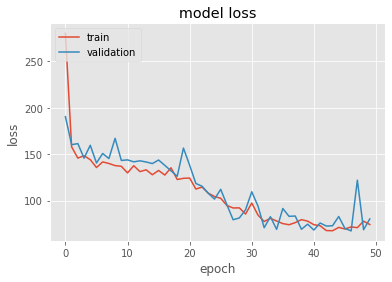

In [589]:
# max([np.abs(pr-pra) for pr, pra in predictions])
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [429]:
# aa = [y for x, y in zip(y_test,range(len(y_test))) if x[0]<10 and x[1]>90]
# print(aa)
# print(predictions[aa[0]])
# print(y_test[aa[0]])
# print(np.mean(X_test[aa[0]][0]))
# sns.distplot(X_test[aa[0]][0])

5.270249245744945
6.73265558629161


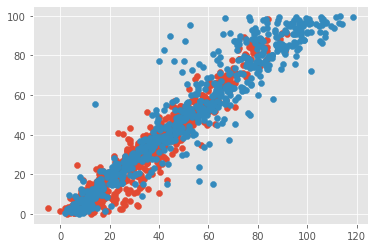

In [590]:
pred = [x[0] for x in predictions.tolist()]
y_t = [y[0] for y in y_test]

plt.scatter(pred,y_t)
print(mean_absolute_error(pred,y_t))


pred = [x[1] for x in predictions.tolist()]
y_t = [y[1] for y in y_test]

plt.scatter(pred,y_t)
print(mean_absolute_error(pred,y_t))

5.136091111543479
5.650087984701134


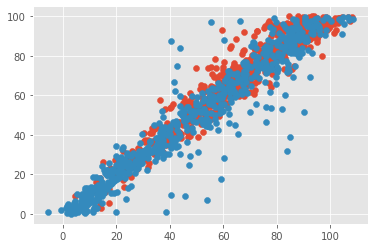

In [591]:
pred = [x[2] for x in predictions.tolist()]
y_t = [y[2] for y in y_test]

plt.scatter(pred,y_t)
print(mean_absolute_error(pred,y_t))


pred = [x[3] for x in predictions.tolist()]
y_t = [y[3] for y in y_test]

plt.scatter(pred,y_t)
print(mean_absolute_error(pred,y_t))

In [598]:
pvals = [] 
  
for i in range(len(y_test)):
  parms = y_test[i]
  predictions[i]
  m1, s1, m2, s2 = (parms[0], parms[1], parms[2],parms[3])
  x1 = np.random.normal(m1, s1,size=1000).tolist() + np.random.normal(m2, s2,size=1000).tolist()
  m1, s1, m2, s2 = (predictions[i][0],predictions[i][1],predictions[i][2],predictions[i][3])
  if s1<0:
    s1 = 1
  if s2<0:
    s2 = 1
  x2 = np.random.normal(m1, s1,size=1000).tolist() + np.random.normal(m2, s2,size=1000).tolist()
  pvals.append(resul(x1, x2))

pd.DataFrame({'AD': [x[0] for x in pvals], 'KS': [x[1] for x in pvals]}).describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: p-value floored: true value smaller than 0.001
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: p-value capped: true value larger than 0.25
  This is separate from the ipykernel package so we can avoid doing imports until


,AD,KS
count,660.000000,6.600000e+02
mean,0.070710,1.415240e-01
std,0.095319,2.283322e-01
min,0.001000,8.584874e-202
25%,0.001000,2.581374e-05
50%,0.012505,1.809676e-02
75%,0.125498,1.979604e-01
max,0.250000,9.699601e-01


In [ ]:
## Ejemplo pedorro

# import numpy as np
# from tensorflow import keras
# from tensorflow.keras import layers


# inputA = layers.Input(shape=(2,))
# xA = layers.Dense(8, activation='relu')(inputA)

# inputB = layers.Input(shape=(3,))
# xB = layers.Dense(8, activation='relu')(inputB)

# merged = layers.Concatenate()([xA, xB])

# output = layers.Dense(1, activation='linear')(merged)    

# model = keras.Model(inputs=[inputA, inputB], outputs=output)

# a = np.array([[1, 2], [2,3], [4,6]])#.reshape(1,-1)
# b = np.array([[3, 4, 5], [6,8,3], [35,2,43]])#.reshape(1,-1)

# model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
# model.fit([a,b], np.array([0,1,2]), epochs=2)


# model.predict([a, b])

# Ideas por agregar:


*   Calcular por tipo de Bimodalidad YA
*   Calcular agregando percentiles y estadísticos YA
*   Hiperparametrizar las hidden layers



In [ ]:
for v in dir(): del globals()[v]

In [ ]:
# COLS = list(range(0,500*2-1))+['mu_1','sigma_1','mu_2','sigma_2']
# df = pd.DataFrame(columns=COLS)

evidencia = []
resultados = []

for i in range(500):
  mu1, sigma1 = np.random.uniform(low=0, high=50, size=2)
  mu2, sigma2 = np.random.uniform(low=50, high=100, size=2)
  s1 = np.random.normal(mu1, sigma1, 250).tolist()
  s2 = np.random.normal(mu2, sigma2, 250).tolist()
  valor = sorted(s1+s2)
  dplot = sns.distplot(valor, kde=True, bins = 45)
  coords = dplot.get_lines()[0].get_data()
  barras = [h.get_height() for h in dplot.patches]
  plt.close()

  evidencia.append([valor,
                    coords[0],
                    coords[1],
                    np.array(barras)
                    ])
  resultados.append([mu1, sigma1, mu2, sigma2])

In [ ]:
X = evidencia
y = resultados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
input0 = Input(shape=(len(valor),))
input1 = Input(shape=(len(coords[1]),))
input2 = Input(shape=(len(coords[1]),))
input3 = Input(shape=(len(barras),))
inputs_ = [input0, input1, input2, input3]
merged = Concatenate(axis=1)(inputs_)
dense1 = Dense(328, input_dim=4, kernel_initializer='normal', activation='relu')(merged)#, activation='sigmoid', use_bias=True
dense2 = Dense(64, activation='relu')(dense1)
dense3 = Dense(32, activation='relu')(dense2)
dense41 = Dense(16, activation='relu')(dense3)
dense4 = Dense(8, activation='relu')(dense41)
output = Dense(1, activation='linear')(dense4)
model10 = keras.models.Model(inputs=inputs_, outputs=output)
model10.summary()

Model: "model_40"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_131 (InputLayer)          [(None, 500)]        0                                            
__________________________________________________________________________________________________
input_132 (InputLayer)          [(None, 200)]        0                                            
__________________________________________________________________________________________________
input_133 (InputLayer)          [(None, 200)]        0                                            
__________________________________________________________________________________________________
input_134 (InputLayer)          [(None, 45)]         0                                            
___________________________________________________________________________________________

In [ ]:
inp0=[]
inp1=[]
inp3=[]
inp2=[]

for a in X_train:
  inp0.append(a[0])
  inp1.append(a[1].tolist())
  inp2.append(a[2].tolist())
  inp3.append(a[3].tolist())

outp1 = []

for b in y_train:
  outp1.append([b[3]])

inp0 = np.array(inp0)
inp1 = np.array(inp1)
inp2 = np.array(inp2)
inp3 = np.array(inp3)

outp1 = np.asarray(outp1)

In [ ]:
from tensorflow.keras.callbacks import TensorBoard
import datetime
logdir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = TensorBoard(log_dir= logdir)

model10.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

history=model10.fit([inp0, inp1, inp2, inp3], outp1, 
                  epochs=40, 
                  verbose=1,
                  validation_split=0.2,
                  callbacks=[tensorboard])

# predictions = model10.predict((X_test))

Epoch 1/40
9/9 [==============================] - 1s 53ms/step - loss: 5983.1259 - mse: 5983.1259 - mae: 58.9152 - val_loss: 63.5841 - val_mse: 63.5841 - val_mae: 5.9299
Epoch 2/40
9/9 [==============================] - 0s 8ms/step - loss: 49.9772 - mse: 49.9772 - mae: 5.4989 - val_loss: 63.6718 - val_mse: 63.6718 - val_mae: 6.3027
Epoch 3/40
9/9 [==============================] - 0s 8ms/step - loss: 65.1412 - mse: 65.1412 - mae: 6.4004 - val_loss: 72.4682 - val_mse: 72.4682 - val_mae: 6.4402
Epoch 4/40
9/9 [==============================] - 0s 8ms/step - loss: 56.4972 - mse: 56.4972 - mae: 5.9534 - val_loss: 59.5867 - val_mse: 59.5867 - val_mae: 5.7315
Epoch 5/40
9/9 [==============================] - 0s 8ms/step - loss: 45.6416 - mse: 45.6416 - mae: 5.3411 - val_loss: 51.8753 - val_mse: 51.8753 - val_mae: 5.3572
Epoch 6/40
9/9 [==============================] - 0s 8ms/step - loss: 41.5979 - mse: 41.5979 - mae: 5.1251 - val_loss: 51.7307 - val_mse: 51.7307 - val_mae: 5.8338
Epoch 7/40

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs/fit

## TEST Bondad y Ajuste

In [2]:
from scipy import stats
import numpy as np

In [45]:
x1 = np.random.normal(size=10000)
x2 = np.random.normal(size=10000)

def resul(x1, x2):
  pval_ad = stats.anderson_ksamp([x1,x2]).significance_level
  pval_ks = stats.ks_2samp(x1, x2).pvalue
  return (pval_ad, pval_ks)